# **Project 2 WBS Coding School**   
# **The benefits of discounting products**

## 1. Importing the used modules and loading the original .csv files:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#To reduce repetitive code, an "overview" function to investigate DataFrames.
def overview(df):

    # General Information.
    print("General Information:")
    display(df.info())

    # Basic description.
    print("Basic statistical description:")
    display(df.describe())

    # Unique Values for each column.
    print("Uniques per column:")
    display(df.nunique())

    # How many duplicates.
    print("Sum of duplicates:")
    display(df.duplicated().sum())

    # And how many missing values.
    print("Sum of missing data per column:")
    display(df.isna().sum())
    
    # A few samples of the DataFrame.
    print("Sample:")
    display(df.sample(10))


# use ur own path or take the uploaded files!!!, orderlines as ol, orders as o, products as pro
# prolly not needed: brands_df = pd.read_csv(r'C:\Users\AlexD\Desktop\WBS Bootcamp\Portfolioprojekte\Project 2 - Data Cleaning\Original CSV´s\brands.csv')
# ol_df = pd.read_csv(r'C:\Users\AlexD\Desktop\WBS Bootcamp\Portfolioprojekte\Project 2 - Data Cleaning\Original CSV´s\orderlines.csv')
# o_df =  pd.read_csv(r'C:\Users\AlexD\Desktop\WBS Bootcamp\Portfolioprojekte\Project 2 - Data Cleaning\Original CSV´s\orders.csv')
# pro_df = pd.read_csv(r'C:\Users\AlexD\Desktop\WBS Bootcamp\Portfolioprojekte\Project 2 - Data Cleaning\Original CSV´s\products.csv')

# all the url:
url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing" # orderlines.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
ol_df = pd.read_csv(path)
url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=sharing" # orders.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
o_df = pd.read_csv(path)
url = "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=sharing" # products.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
pro_df = pd.read_csv(path)


## 2. First exploration of the three important dataframes: orderlines, orders and products:

using .info, .describe, .nunique, .sample, sum of .duplicated and .isna - to get a short overview over the different dataframes, aswell as dropping useless/corrupted columns.

Keeping in mind our questions:
* How many orders are there?
* How many products are there?
* What period of time do these orders comprise?
* How many orders are Completed?
* How should revenue be computed?

### orderlines.csv – Every row represents each one of the different products involved in an order.  
* id – a unique identifier for each row in this file  
* id_order – corresponds to orders.order_id  
* product_id – an old identifier for each product, nowadays not in use  
* product_quantity – how many units of that product were purchased on that order  
* sku – stock keeping unit: a unique identifier for each product  
* unit_price – the unitary price (in euros) of each product at the moment of placing that order  
* date – timestamp for the processing of that product  

In [2]:
overview(ol_df)
# we see there: unit-price Dtype should be "int", date Dtype "date"

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


None

Basic statistical description:


,id,id_order,product_id,product_quantity
count,2.939830e+05,293983.000000,293983.0,293983.000000
mean,1.397918e+06,419999.116544,0.0,1.121126
std,1.530096e+05,66344.486479,0.0,3.396569
min,1.119109e+06,241319.000000,0.0,1.000000
25%,1.262542e+06,362258.500000,0.0,1.000000
50%,1.406940e+06,425956.000000,0.0,1.000000
75%,1.531322e+06,478657.000000,0.0,1.000000
max,1.650203e+06,527401.000000,0.0,999.000000


Uniques per column:


id                  293983
id_order            204855
product_id               1
product_quantity        67
sku                   7951
unit_price           11329
date                251631
dtype: int64

Sum of duplicates:


0

Sum of missing data per column:


id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

Sample:


,id,id_order,product_id,product_quantity,sku,unit_price,date
105685,1320163,390496,0,1,PAC0653,159.58,2017-08-18 17:12:02
45822,1213826,339340,0,1,QNA0149,307.43,2017-03-26 19:18:38
165975,1444464,442432,0,1,BOS0060,26.09,2017-11-25 01:24:49
19865,1164446,317056,0,1,APP1216,138.99,2017-01-30 01:13:56
86751,1285665,374158,0,1,TWS0074,36.99,2017-07-07 11:54:36
613,1120287,300126,0,1,LIF0112,61.74,2017-01-01 23:57:22
26232,1177182,322617,0,1,APP1706,352.06,2017-02-11 15:08:17
203743,1499069,464060,0,1,APP0662,144.00,2017-12-15 20:20:46
146592,1406208,426131,0,1,APP1922,162.00,2017-11-13 00:04:05
219353,1529114,477977,0,2,SNS0019,170.05,2017-12-31 16:28:33


In [3]:
# dropping the useless old id:
ol_df.drop(['product_id'], axis=1, inplace=True)

In [4]:
# date should be datetime:
ol_df['date'] = pd.to_datetime(ol_df['date'])

In [5]:
# unit_price contains the "2-dot-problem":
ol_df.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()
# since that count "only" makes around 12% we just remove:
two_dot_order_ids_list = ol_df.loc[ol_df.unit_price.str.contains("\d+\.\d+\.\d+"), "id_order"]
ol_df = ol_df.loc[~ol_df.id_order.isin(two_dot_order_ids_list)]
# so it can changed to numeric Datatype:
ol_df["unit_price"] = pd.to_numeric(ol_df["unit_price"])

In [6]:
# see if it worked:
ol_df.info()
# memory usage went down.
# columns are reduced to enhance readability/ possibility to merge.
# unit_price is float, date is datetime.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216250 entries, 0 to 293982
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                216250 non-null  int64         
 1   id_order          216250 non-null  int64         
 2   product_quantity  216250 non-null  int64         
 3   sku               216250 non-null  object        
 4   unit_price        216250 non-null  float64       
 5   date              216250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 11.5+ MB


### orders.csv – Every row in this file represents an order.
* order_id – a unique identifier for each order  
* created_date – a timestamp for when the order was created  
* total_paid – the total amount paid by the customer for this order, in euros  
* state:   
    * “Shopping basket” – products have been placed in the shopping basket, but the order has not been processed yet.  
    * “Pending” – the shopping basket has been processed, but payment confirmation is pending.  
    * “Completed” – the order has been placed and paid, and the transaction is completed.  
    * “Cancelled” – the order has been cancelled and the payment returned to the customer.  

In [7]:
overview(o_df)

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


None

Basic statistical description:


,order_id,total_paid
count,226909.000000,226904.000000
mean,413296.482480,569.225818
std,65919.250331,1761.778002
min,241319.000000,0.000000
25%,356263.000000,34.190000
50%,413040.000000,112.990000
75%,470553.000000,525.980000
max,527401.000000,214747.530000


Uniques per column:


order_id        226909
created_date    224828
total_paid       31236
state                5
dtype: int64

Sum of duplicates:


0

Sum of missing data per column:


order_id        0
created_date    0
total_paid      5
state           0
dtype: int64

Sample:


,order_id,created_date,total_paid,state
97202,396785,2017-09-05 16:45:05,444.80,Shopping Basket
213736,514227,2018-02-19 12:16:54,293.37,Shopping Basket
156307,456531,2017-12-06 21:44:30,986.59,Place Order
46792,346285,2017-04-15 11:00:07,199.97,Completed
93178,392757,2017-08-25 19:14:08,24.99,Shopping Basket
50804,350299,2017-04-27 12:06:40,50.97,Completed
167279,467602,2017-12-20 09:59:40,0.00,Place Order
197985,498469,2018-01-25 17:05:57,66.97,Completed
204231,504719,2018-02-02 23:39:05,49.96,Completed
147758,447871,2017-11-27 12:22:05,119.99,Shopping Basket


In [8]:
# Since 5 missing values are nothing, compared to the whole number of entries, we just drop them:
o_df = o_df.loc[~o_df.total_paid.isna(), :]

In [9]:
# created_date should be datetime:
o_df["created_date"] = pd.to_datetime(o_df["created_date"])

In [10]:
# See if it worked:
# No "non-null" and fixed datetime.
o_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226904 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226904 non-null  int64         
 1   created_date  226904 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226904 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.7+ MB


### products.csv
* sku – stock keeping unit: a unique identifier for each product  
* name – product name  
* desc – product description  
* in_stock – whether or not the product was in stock at the moment of the data extraction  
* type – a numerical code for product type  

In [11]:
overview(pro_df)

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


None

Basic statistical description:


,in_stock
count,19326.000000
mean,0.109593
std,0.312390
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Uniques per column:


sku            10579
name           10373
desc            7098
price           2690
promo_price     4614
in_stock           2
type             126
dtype: int64

Sum of duplicates:


8746

Sum of missing data per column:


sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

Sample:


,sku,name,desc,price,promo_price,in_stock,type
6776,PAC1607,"Apple iMac 27 ""Core i5 3.3GHz Retina 5K | 8GB ...",Desktop computer iMac 27-inch 3.3GHz Core i5 5...,3349,29.099.895,0,"5,74E+15"
12564,SAN0132,Sandisk iXpand Lightning to USB 3.0 16GB,16GB storage unit for iPhone and iPad,34.99,283.745,1,42945397
17004,PAC2177,Pack QNAP TS-251A NAS Server | 4GB RAM | 12TB ...,NAS with 4GB of RAM and two hard disks 6TB (2x...,908.09,7.251.784,1,12175397
9058,APP1252,"Apple iMac 21.5 ""Core i5 2.8GHz | 16GB | 2TB F...",PC 215 inch iMac 2.8GHz RAM 16GB 2TB Fusion (M...,2189,20.495.839,0,1282
19266,WDT0416,"WD Hard Drive 8TB Gold 35 ""Servers",Hard Western Digital 8TB 35 inches SATA 6 Gb /...,419,3.059.945,1,12655397
8197,PAC1574,"Apple iMac 21.5 ""Core i5 3.1GHz 4K Retina | 8G...",Desktop computer iMac 21.5-inch 3.1GHz Core i5...,2209,15.799.902,0,1282
742,PAC0860,Apple Mac Pro 12-core 27 Ghz | 32GB RAM | 512G...,New Mac Pro with 32GB of RAM 12-core GPU 6GB 5...,9689,90.019.898,0,1282
4354,PAC1032,"Apple iMac 27 ""Core i5 3.3GHz Retina 5K | 16GB...",IMac desktop computer 27 inch 5K Retina i5 3.3...,2869,23.055.848,0,"5,74E+15"
18471,APP2702,"Apple iMac Pro 27 ""10-core Intel Xeon 3GHz W |...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,7419,69.740.044,0,118692158
6486,PAC1070,"Apple iMac 27 ""Core i5 3.3GHz Retina 5K | 32GB...",IMac desktop computer 27 inch 5K Retina i5 3.3...,4369,37.659.895,0,"5,74E+15"


In [12]:
# as we discovered at 3_2, products['promo_price'] is way too corrupted to work further with it, so we drop it.
# desc, in_stock and type seem useless for our investigation, so we also just drop them, we recall them later if needed. - "Recalled" 'desc' to improve categories if time
pro_df.drop(['promo_price', 'in_stock'], axis=1, inplace=True)


In [13]:
# quickly removing those missing price rows:
pro_df = pro_df.loc[~pro_df.price.isna(), :]

In [14]:
# again having the "2-dot-problem" with the price column:
pro_df = pro_df.loc[(~pro_df.price.astype(str).str.contains("\d+\.\d+\.\d+"))&(~pro_df.price.astype(str).str.contains("\d+\.\d{3,}")), :]

pro_df["price"] = pd.to_numeric(pro_df["price"])

In [15]:

# Tons of bad code to categorize with the type column:
category_type_df = pro_df.copy()
# category_type_df.groupby("type").count().nlargest(30, "sku") # To get the 30 largest used values in "Type"

# manually added into a replace function while questioning life and decision making
category_type_df["type"] = category_type_df["type"].replace(["11865403","12175397","1298","11935397","11905404",
                                                             "1282","12635403","13835403","5,74E+15","1364",
                                                             "12585395","1296","1325","5384","1433",
                                                             "12215397","5398","1,02E+12","1,44E+11","57445397",
                                                             "1334","2158","2449","12655397","1229",
                                                             "12995397","1515","13615399","13555403","1405"],
                                                             ["Protectors_etc", "Servers", "Protectors_etc", "Hard_drive", "Electronic_devices",
                                                              "Apple_PC_Laptop", "Apple_var", "Apple_var", "App_PC_Laptop", "Apple_var",
                                                              "External_Memory", "Monitor", "Cable", "Audio", "Hard_drive",                                                             
                                                              "Hard_drive", "Audio", "Apple_PC_Laptop", "Repair_Service", "External_Memory", 
                                                              "Router", "Apple_PC_Laptop", "Apple_var", "Hard_drive", "Electronic_devices",
                                                              "External_Memory", "USB", "Charger", "Protectors_etc", "Tablets"])

# get a list of the missing values in "type"
category_type_df["type"].unique()

# to replace the non-descriptive ones with "other"
category_type_df["type"] = category_type_df["type"].replace(['8696', '13855401', '1387', '1230','13005399',
                                                            '13955395', '1216', '12355400', '5,49E+11', '1276',
                                                            '12755395','12285400','1404', '101781405', '4259',
                                                            '14035403', '12085400','1424','9094', 'nan', '14305406', 
                                                            '10142', '12645406', '10230','11821715', '14365395', '5405',
                                                            '5395', '21485407', '20642062', '1280', '12575403', '5720',
                                                            '1392', '1231', '15435404', '1375', '42945397',
                                                            '12141714', '54025401', '21535407', '1416', '2,17E+11', '24215399',
                                                            '11434', '2425', '2434', '13621714', '24861714', '24821716',
                                                            '54864259', '51861714', '1714', '51601716', '51871714', '5403',
                                                            '54085407', '24885185', '24895185', '5407',
                                                            '5406', '5404', '5,44E+11', '85641716', '42931714', '24811716',
                                                            '85651716', '51882158', '5,43E+15', '5,72E+15', '5401', '12051714',
                                                            '9,29E+11', '5399', '1716', '21622158', '5,39E+11', '12031714',
                                                            '21571716', '2,16E+11', '106431714', '21632158', '21561716',
                                                            '79201715', '51902158', '5185', '113291716', '113281716',
                                                            '113271716', '5,45E+15', '113851714', '11859', '118692158',
                                                            '51912158', '113464259', '12282'], 'other')

pro_df.drop(['type'], axis=1, inplace=True)
category_type_df.drop(['name','price','desc'], axis=1, inplace=True)
# category_type_df.sample(5) # see if it worked

# some stuff that didnt work:
# merging the copy onto the original without type again
# category_type_df.drop(['name','price'], axis=1, inplace=True)
# pro_df.merge(category_type_df,how='inner', left_on='sku', right_on='sku')
# pro_df.sample(25)


In [16]:
# seeing, if it worked:
# size is half (not that it matters here), number of columns reduced.
pro_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18684 entries, 0 to 19325
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sku     18684 non-null  object 
 1   name    18684 non-null  object 
 2   desc    18678 non-null  object 
 3   price   18684 non-null  float64
dtypes: float64(1), object(3)
memory usage: 729.8+ KB


## 3. Merging our cleaned data into one df to work with:

In [17]:
# the task should be to preserve most data we just cleaned within the merged, so we merge onto the orderlines, later filtering by e.g. 'state'.
placeholder_df = ol_df.merge(o_df, left_on='id_order', right_on='order_id')

# see if it worked:
# placeholder_df.info()

# merge the next table
work_df = placeholder_df.merge(pro_df, left_on='sku', right_on='sku')

# see if it worked:
# work_df.info()
# work_df.sample(10)

# .sample showing that we should change the order of the columns and be dropping the now useless id´s from the merge:
work_df.drop(['id_order', 'order_id'], axis=1, inplace=True)
work2_df = work_df.merge(category_type_df, left_on='sku', right_on='sku')

list(work2_df.columns) # overview to sort columns logically:
sorted_df = work2_df[['id','sku','name','desc','created_date','date','price','unit_price','total_paid','product_quantity','state','type']] # sort columns
# sorted_df.sample(10) # worked out

# only state = completed is interesting:
completedorders_df = sorted_df.loc[sorted_df['state']=='Completed']
# completedorders_df.sample(10) # worked out
completedorders_df.drop(['state'], axis=1, inplace=True)

# total_paid and product_quantity should be dropped when we created a new column out of them:
completedorders_df = completedorders_df.assign(actual_price=completedorders_df['total_paid'] / completedorders_df['product_quantity'])
# completedorders_df.sample(25) # worked out

# "leftover" columns should be dropped to clear the whole thing even more:
completedorders_df.drop(['total_paid','date'], axis=1, inplace=True)
completedorders_df.sample(25)

# .sample shows that we cannot work with 'actual_price', so this gets dropped for having to finish this some day:
completedorders_df.drop(['actual_price'], axis=1, inplace=True)

# .copy as an easy workaround to rename the dataframe to something to work with:
clean_df = completedorders_df.copy()
clean_df.sample(10)


C:\Users\AlexD\AppData\Local\Temp\ipykernel_7612\1979011241.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completedorders_df.drop(['state'], axis=1, inplace=True) # so drop that column


,id,sku,name,desc,created_date,price,unit_price,product_quantity,type
152107,1584433,MOS0172,Moshi iGlaze Case Napa iPhone 6 / 6S Midnight ...,Double casing for iPhone protective layer 6 / 6S.,2018-01-28 11:38:35,45.00,24.49,1,Protectors_etc
87652,1412039,IFX0012,iFixit Essential Toolkit Electronics Starter Kit,Set basic tools for iPhone iPad Mac and PC.,2017-11-16 17:29:05,29.90,29.99,1,other
208986,1496199,NEA0020,Netatmo intelligent radiator valve,thermostatic valve radiator temperature contro...,2017-12-14 11:45:34,79.99,76.00,1,Electronic_devices
14684,1149731,BEL0263,"Belkin Pleated MacBook Pro 13.3 ""Black",Cover lightly with zippers with soft fabric fo...,2017-01-17 15:19:29,39.99,19.99,1,Apple_var
25690,1353375,PAC1410,Synology DS716 + II | 8GB RAM Mac and PC Serve...,2 bay NAS server and 8GB of RAM for Mac iPad a...,2017-09-16 15:36:09,566.89,556.99,1,Servers
96415,1448005,CRU0034-2,Crucial memory Mac 4GB (2x2GB) SO-DIMM DDR3 10...,RAM 4GB (2x2GB) Mac mini iMac MacBook and MacB...,2017-11-25 19:19:09,59.98,45.04,1,Apple_var
182310,1382814,ZAG0030,Zagg Folio Case Color Keyboard Folio iPad Air ...,Case with Bluetooth Keyboard for iPad Air 2 Sp...,2017-10-20 09:33:00,79.99,19.99,1,other
102812,1344532,LAC0206,LaCie d2 Hard Drive 4TB Thunderbolt 2 USB 3.0,4TB external hard drive designed to work 24x7 ...,2017-09-04 10:31:51,309.00,281.79,1,Hard_drive
116783,1137418,KIN0124-2,Mac memory Kingston 8GB (2x4GB) SO-DIMM DDR3 1...,Mac memory Kingston 8GB (2x4GB) HyperX DDR3 SO...,2017-01-09 15:43:39,73.98,78.99,1,Apple_var
14640,1162768,LGE0034,"LG 29UM68-P Monitor 29 ""IPS widescreen UXGA Ultra",29-inch IPS monitor: color accuracy sRGB split...,2017-01-28 16:53:39,299.00,287.99,1,Monitor


In [18]:
# overview(clean_df)

## 4. Various tinkering with the "clean" df, regarding our questions to solve:

Discount calculation:


In [19]:
# creating a discount number
clean_df["discount_dollar"] = (clean_df["price"]) - (clean_df["unit_price"]) 

# Calculating relative discount from absolute.
clean_df["discount_perc"] = round(100 * (clean_df["discount_dollar"]) / (clean_df["price"])) 

# And show that Calculation in the new dataframe:
# clean_df.sample(5)

Revenue column:

In [20]:
# Creating a revenue column.
clean_df["revenue"] = (clean_df["product_quantity"]) * (clean_df["unit_price"])

Refining dates:

In [21]:
# Adding extra columns regarding year, month, day
clean_df["month_name"] = clean_df["created_date"].dt.month_name()
clean_df["year"] = clean_df["created_date"].dt.year
clean_df["day"] = clean_df["created_date"].dt.day

Reorganise DataFrame:

In [22]:
# Getting a list of col names:
clean_col_list = clean_df.columns.values.tolist()
print(clean_col_list)

# Organising this list:
final_df = clean_df[['id','sku','name','desc','created_date','year','month_name','day','price','unit_price','discount_dollar','discount_perc','revenue','type']]

# See if/how it worked:
final_df.sample(5)

['id', 'sku', 'name', 'desc', 'created_date', 'price', 'unit_price', 'product_quantity', 'type', 'discount_dollar', 'discount_perc', 'revenue', 'month_name', 'year', 'day']


,id,sku,name,desc,created_date,year,month_name,day,price,unit_price,discount_dollar,discount_perc,revenue,type
142416,1173898,GRT0440,Griffin Survivor iPhone Case Wallet 7/8 Clear ...,Polycarbonate cover with lid and slots for iPh...,2017-02-07 22:30:37,2017,February,7,29.99,19.99,10.00,33.0,19.99,Protectors_etc
200945,1387595,DRO0020-A,Open - 5C Drobo 5-bay DAS RAID USB-C USB 3.0,RAID 5 bays and USB 3.0 Type-C for Mac and PC,2017-10-25 01:40:48,2017,October,25,429.00,321.47,107.53,25.0,321.47,Protectors_etc
166275,1295716,APP1972,Apple iPhone 32GB Rose Gold,New iPhone SE with 4-inch screen 32 free GB.,2017-07-18 09:47:26,2017,July,18,419.00,359.00,60.00,14.0,359.00,other
209723,1529912,FIT0062,Fitbit Smartwatch Ionic Gray,Fitbit is the sports Smartwatch Ionic waterpro...,2018-01-01 13:21:01,2018,January,1,349.95,299.00,50.95,15.0,299.00,Electronic_devices
77891,1489732,APP1190,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,2017-12-11 20:10:12,2017,December,11,70.00,56.00,14.00,20.0,112.00,other


In [23]:
# Another check if it´s not messed up:
# overview(final_df)
# Should validate size of data at start of presentation!

## 5. Various coding for answering/creating various questions/plots:

Example Questions:
* How products should be classified into different categories to simplify reports and analysis.
* What is the distribution of product prices across different categories.
* How many products are being discounted.
* How big are the offered discounts as a percentage of the product prices.
* How seasonality and special dates (Christmas, Black Friday) affect sales.
* How could data collection be improved.
* What is the time period that the dataset covers?
* What is the overall revenue for that time?
* Are there seasonal patterns in the evolution of sales?
* What are the most sold products?
* What are the products that generate the most revenue?  
...

Discount/revenue relation:

In [24]:
final_df.groupby("month_name").agg({"revenue":"sum","discount_perc":"mean"})
# add year as well:
final_df.groupby(["year","month_name"]).agg({"revenue":"sum","discount_perc":"mean"})


revenue  discount_perc
year month_name                           
2017 April        289411.66      17.715119
     August       425283.87      20.472145
     December    1120598.61      19.494403
     February     440416.08      18.789677
     January      709129.89      24.294164
     July         683666.51      24.696819
     June         335893.98      17.115486
     March         26549.45      18.756757
     May          408805.36      15.265071
     November    1675569.98      22.083824
     October      594848.18      22.022961
     September    450478.13      19.720677
2018 February     608162.22      22.534901
     January      947304.38      21.929093
     March        243125.24      22.000584

Showing best "revenue dates" aswell as high discount impact:

In [25]:
final_df.groupby(final_df["created_date"].dt.date).agg({"revenue":"sum","discount_perc":"mean"}).nlargest(10,"revenue")
# To visualize use scatterplot with x = "date", y = "revenue" hue = "discount_perc" 
# - either round perc before or use "# Revenue of discounted vs not discounted products:" which is shown later

# FYI:
# https://stackabuse.com/seaborn-scatter-plot-tutorial-and-examples/ - extremely epic 3D plot
# https://stackoverflow.com/questions/44941082/plot-multiple-columns-of-pandas-dataframe-using-seaborn - or this thing

# two seperate diagrams matching with dates
# if we take the top average discounts per day. 
# so the question is how they are announcing/advertising the discounts? how do we know the discounts are motivating the sales? 
final_df.groupby(final_df["created_date"].dt.date).agg({"revenue":"sum","discount_perc":"mean"}).nlargest(10,"discount_perc")
# maybe drop date there? looks nice in a table right after the one before but not really useful regarding the questioning underlaying it...

,revenue,discount_perc
created_date,,
2018-02-16,16191.34,61.891697
2017-02-24,99.98,54.000000
2017-03-12,62.80,50.666667
2018-03-14,2059.87,49.620690
2017-10-20,20106.05,48.995798
2017-12-22,28518.91,45.427653
2017-07-05,22169.45,41.459184
2017-07-07,20589.53,39.918919
2017-01-27,23223.77,38.904594


Create data for the bar chart out of data above - "High Discount":

c:\Users\AlexD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Revenue/Discount on the 10 days with highest discount:')

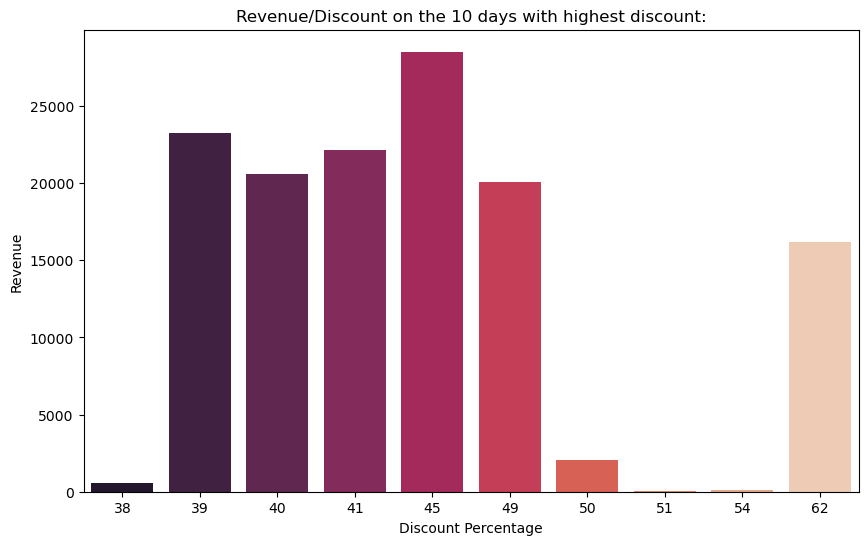

In [26]:
# Just the rounded "discount_perc" out of the list above:
discount_perc = [62, 54, 51, 50, 49, 45, 41, 40, 39, 38] 

# Revenue doesn´t need to get rounded since it´s value doesn´t get shown:
revenue = [16191.34, 99.98, 62.80, 2059.87, 20106.05, 28518.91, 22169.45, 20589.53, 23223.77, 572.87] 

# Set figure size and create bar chart:
plt.figure(figsize=(10, 6)) # Play around! 
sns.barplot(discount_perc, revenue, palette='rocket')

# Add labels and title:
plt.xlabel('Discount Percentage')
plt.ylabel('Revenue')
plt.title('Revenue/Discount on the 10 days with highest discount:')


Again highest revenue days:

In [27]:
final_df.groupby(final_df["created_date"].dt.date).agg({"revenue":"sum","discount_perc":"mean"}).nlargest(10,"revenue")

,revenue,discount_perc
created_date,,
2017-11-24,413377.91,22.820731
2017-11-27,236955.22,24.363636
2017-11-23,198589.60,23.644397
2017-11-26,143920.06,25.800000
2017-11-25,111939.92,23.409524
2018-01-02,81374.63,19.063985
2017-12-20,76730.56,16.307087
2017-12-28,71191.80,21.063107
2017-12-18,68936.02,15.817284


Highest revenue days scatterplot:

c:\Users\AlexD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discount on days with highest revenue:')

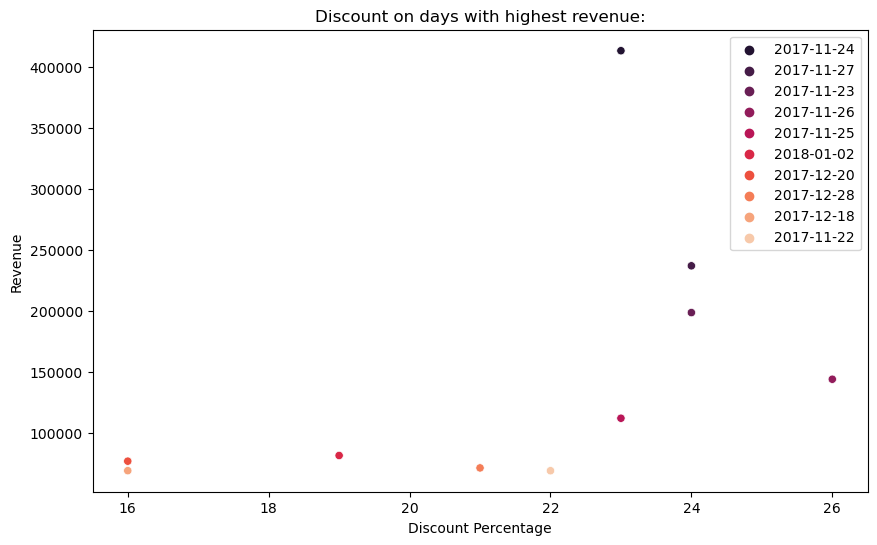

In [28]:
# As shown above:
created_date = ['2017-11-24', '2017-11-27', '2017-11-23', '2017-11-26', '2017-11-25', '2018-01-02', '2017-12-20', '2017-12-28', '2017-12-18', '2017-11-22']
revenue = [413377.91, 236955.22, 198589.60, 143920.06, 111939.92, 81374.63, 76730.56, 71191.80, 68936.02, 68886.27]
discount_perc = [23, 24, 24, 26, 23, 19, 16, 21, 16, 22]

# Set figure size and create scatter plot
plt.figure(figsize=(10, 6)) # first for x, second for y
sns.scatterplot(discount_perc, revenue, hue=created_date, palette='rocket')

# Add labels and title:
plt.xlabel('Discount Percentage')
plt.ylabel('Revenue')
plt.title('Discount on days with highest revenue:')


Distribution of revenue through product categories:

In [29]:
final_df.groupby("type")["revenue"].sum().nlargest(16)
# revenue_type_plot.drop("other") - didnt work
# should work more on "other", maybe combine with already given solution via name/desc
# sns.catplot(x='type', y='revenue', data=revenue_type_plot, kind='bar')

type
other                 3099033.40
Hard_drive            1839091.31
Servers               1072152.38
Monitor                668737.24
Apple_var              488643.04
Audio                  412083.73
Electronic_devices     353320.03
External_Memory        255964.06
Tablets                252231.24
Protectors_etc         238197.80
Apple_PC_Laptop        136165.91
Router                  40149.33
Cable                   36183.88
Charger                 34657.02
USB                     16970.96
Repair_Service           8175.86
Name: revenue, dtype: float64

Using same method as above with other questions:

c:\Users\AlexD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most revenue by categories:')

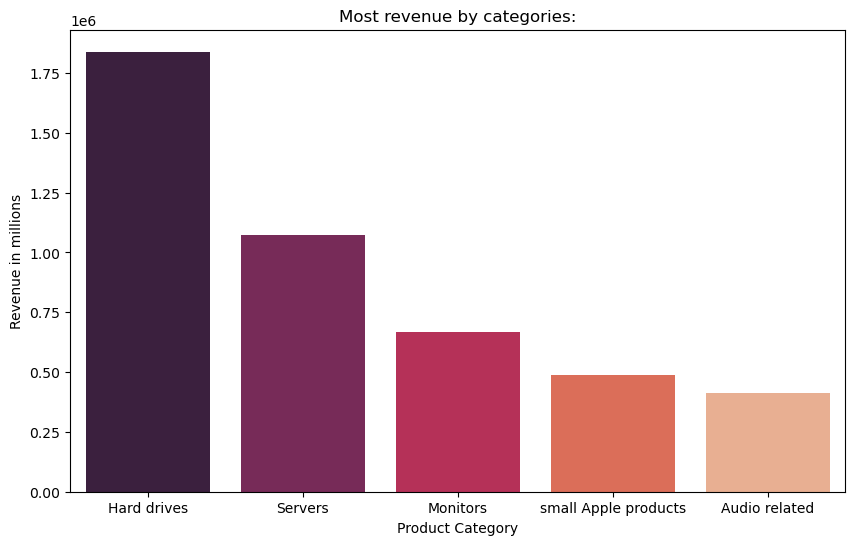

In [30]:
# Never touch a winning system:
category = ['Hard drives','Servers','Monitors','small Apple products','Audio related']
revenue = [1839091,1072152,668737,488643,412083]
# Copy and paste from above:
plt.figure(figsize=(10, 6)) 
sns.barplot(category, revenue, palette='rocket')
# Add labels and title:
plt.xlabel('Product Category')
plt.ylabel('Revenue in millions')
plt.title('Most revenue by categories:')

# Show plot
# plt.show()

Highest discounted product categories:

In [32]:
final_df.groupby("type")["discount_perc"].mean().nlargest(16)

type
USB                   47.350719
Protectors_etc        30.733132
Audio                 26.994048
Charger               25.207547
Router                21.930649
other                 21.908613
External_Memory       21.661194
Tablets               21.649459
Cable                 20.008021
Apple_var             19.625849
Electronic_devices    19.575645
Apple_PC_Laptop       17.894118
Hard_drive            16.842164
Monitor               12.001316
Servers                7.296812
Repair_Service       -10.950495
Name: discount_perc, dtype: float64

More beautiful Average price per category:

In [34]:
unitprice_type = final_df.groupby("type")["unit_price"].mean().sort_values(ascending=False)
# print(unitprice_type)
# unitprice_type.plot(kind="bar", palette="rocket")

# list gotten from commented code above in use:
category = ['Apple PC Laptop', 'Servers', 'Monitor', 'Tablets', 'Hard Drives', 'others', 'Audio',
            'Router', 'Apple', 'Repairing', 'Electronics', 'Memory', 'Protective', 'Charger', 'USB', 'Cables']
average = [743.771294, 476.489443, 388.106230, 196.136903, 178.725035, 165.070122, 
           121.461942, 83.607159, 82.136943, 80.949109, 79.980620, 74.634740, 38.578922, 37.857618, 29.430468, 28.318886]

plt.figure(figsize=(18, 6)) #needed 18 to display category properly
sns.barplot(category, average, palette='rocket')

# Add labels and title:
plt.xlabel('Product Category')
plt.ylabel('Average price')
plt.title('Most revenue by categories:')'

## 6.Stuff that was dismissed (but maybe interesting another time):

In [ ]:
# more or less self explanatory:
# final_df.groupby("month_name")["revenue"].sum()
# not really useful, so put as comment for readability

Revenue of discounted vs not discounted products:

In [ ]:
# sns.displot(final_df, x='discount_perc', y='revenue', kind='kde')
# create a lambda function that returns '>2%' if the value is greater than 2%, and '<2%' otherwise
# greater_than_2 = lambda x: '>2%' if x > 5 else '<2%'
# apply the lambda function to the 'discount' column and save the result in a new column called 'discount_range'
# final_df['discount_range'] = final_df['discount_perc'].apply(greater_than_2)
# final_df.loc[final_df['discount_range'] == '>2%'].sum()
# sns.catplot(x='discount_range', y='revenue', data=final_df, kind='bar', color='black')
# final_df.sample(10)